### khaiii

In [ ]:
!git clone https://github.com/kakao/khaiii.git

In [ ]:
!pip install cmake

In [ ]:
!mkdir build

In [ ]:
!cd build && cmake /content/khaiii

In [ ]:
!cd /content/build/ && make all

In [ ]:
!cd /content/build/ && make resource

In [ ]:
!cd /content/build && make install

In [ ]:
!cd /content/build && make package_python

In [ ]:
!pip install /content/build/package_python

## Tokenize with khaiii

In [2]:
api = KhaiiiApi()

def khaiii_tokenized(s):
  result = []
  for word in api.analyze(s):
    for morph in word.morphs:
      result.append(morph.lex)
  return result

In [ ]:
train_data['tokenized'] = train_data['sentences'].apply(khaiii_tokenized)

## Preprocessing

In [54]:
from khaiii import KhaiiiApi
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [55]:
DF = pd.read_excel('sentence_tokenized.xlsx')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39080 entries, 0 to 39079
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  39080 non-null  int64 
 1   sentence    39080 non-null  object
 2   emotion     39080 non-null  object
 3   tokenized   39080 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [56]:
test_DF = pd.read_excel('test_data.xlsx')
test_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  35 non-null     object
 1   emotion   35 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 688.0+ bytes


In [57]:
total_data = pd.DataFrame()

total_data['sentence'] = DF['sentence']
total_data['emotion'] = DF['emotion']
# total_data['tokenized'] = DF['tokenized']

In [58]:
test_data = pd.DataFrame(test_DF)

In [ ]:
test_data

In [ ]:
total_data.nunique()

In [ ]:
print(total_data.isnull().values.any()) # null 값 확인

In [59]:
total_data['emotion'] = total_data['emotion'].str.replace('공포', '0')
total_data['emotion'] = total_data['emotion'].str.replace('놀람', '1')
total_data['emotion'] = total_data['emotion'].str.replace('분노', '2')
total_data['emotion'] = total_data['emotion'].str.replace('슬픔', '3')
total_data['emotion'] = total_data['emotion'].str.replace('중립', '4')
total_data['emotion'] = total_data['emotion'].str.replace('혐오', '5')
total_data['emotion'] = total_data['emotion'].str.replace('행복', '6')

In [ ]:
total_data['emotion'].value_counts()

In [ ]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 4, 1)
text_len = total_data[total_data['emotion']=='0']['tokenized'].map(lambda x: len(x))
plt.hist(text_len)
plt.title('afraid')
plt.xlabel('length of samples')
plt.ylabel('number of samples')
print('공포 평균 길이 :', np.mean(text_len))

plt.subplot(2, 4, 2)
text_len = total_data[total_data['emotion']=='1']['tokenized'].map(lambda x: len(x))
plt.hist(text_len)
plt.title('surprise')
plt.xlabel('length of samples')
plt.ylabel('number of samples')
print('놀람 평균 길이 :', np.mean(text_len))

plt.subplot(2, 4, 3)
text_len = total_data[total_data['emotion']=='2']['tokenized'].map(lambda x: len(x))
plt.hist(text_len)
plt.title('anger')
plt.xlabel('length of samples')
plt.ylabel('number of samples')
print('분노 평균 길이 :', np.mean(text_len))

plt.subplot(2, 4, 4)
text_len = total_data[total_data['emotion']=='3']['tokenized'].map(lambda x: len(x))
plt.hist(text_len)
plt.title('sad')
plt.xlabel('length of samples')
plt.ylabel('number of samples')
print('슬픔 평균 길이 :', np.mean(text_len))

plt.subplot(2, 4, 5)
text_len = total_data[total_data['emotion']=='4']['tokenized'].map(lambda x: len(x))
plt.hist(text_len)
plt.title('neutrality')
plt.xlabel('length of samples')
plt.ylabel('number of samples')
print('중립 평균 길이 :', np.mean(text_len))

plt.subplot(2, 4, 6)
text_len = total_data[total_data['emotion']=='5']['tokenized'].map(lambda x: len(x))
plt.hist(text_len)
plt.title('hatred')
plt.xlabel('length of samples')
plt.ylabel('number of samples')
print('혐오 평균 길이 :', np.mean(text_len))

plt.subplot(2, 4, 7)
text_len = total_data[total_data['emotion']=='6']['tokenized'].map(lambda x: len(x))
plt.hist(text_len)
plt.title('happy')
plt.xlabel('length of samples')
plt.ylabel('number of samples')
print('행복 평균 길이 :', np.mean(text_len))

In [60]:
train_data, valid_data = train_test_split(total_data, test_size=0.2,
                                         random_state=2045)

print(len(train_data))
print(len(test_data))

31264
35


In [9]:
train_data['emotion'].value_counts()

4    4768
2    4768
5    4580
6    4533
3    4331
0    4294
1    3990
Name: emotion, dtype: int64

In [10]:
valid_data['emotion'].value_counts()

5    1214
4    1170
6    1168
2    1164
0    1086
1    1031
3     983
Name: emotion, dtype: int64

In [11]:
test_data['emotion'].value_counts()

6    5
5    5
4    5
3    5
2    5
1    5
0    5
Name: emotion, dtype: int64

In [61]:
train_data['tokenized'] = train_data['sentence'].apply(khaiii_tokenized)
valid_data['tokenized'] = valid_data['sentence'].apply(khaiii_tokenized)
test_data['tokenized'] = test_data['sentence'].apply(khaiii_tokenized)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
train_data['tokenized']

25368    [인간, 세상, 살, 면서, 어쩌, 면, 잊히, ㄴ다는, 기억, 이, 가장, 슬프,...
23314    [남자, 친구, 한테, 기대, 지, 않, 으려면, 어떻, 게, 하, 여야, 하, ㄹ까요]
18472    [재석, 빠, ㅡ, ㅡ, 강호동, 에게, 맞, 을, 때, 마다, 가슴, 이, 아프,...
2576         [깨끗, 하, ㄴ, 연기, 로, 우리, 에게, 크, ㄴ, 기쁨, 을, 주네, 요]
21492                        [좀, 무섭, 기, 도, 하, 고, 진짠가요, ㅜㅜ]
                               ...                        
31463                          [달, 은, 멀, 어서, 가, 기, 힘들, 어요]
14119                               [사랑, 웃기, 고, 자빠지, 었, 네]
29721            [도미니카, 가, 아서, 박현준이, 랑, 원투, 펀치, 가게, 이, ㄴ데]
36361                        [댓글, 부대, 박정원, 돈, 사모, 들, 드글드글]
13710    [그래, 너, 유식, 하, ㄴ, 아버지, 있, 어서, 좋, 겠, 다, 그래서, 어쩌...
Name: tokenized, Length: 31264, dtype: object

In [14]:
valid_data['tokenized']

9581             [형, 도, 아프, 아요, 사랑, 에, 빠지, ㄴ, 형, 도, 아프, 아]
30815          [도대체, 이, 나라, 대통령, 은, 누구, 이, 었, 던, 것, 이, ㄴ가]
28294                 [이참, 에, 국회의원, 들, 자질, 도, 따지, 어, 보, 자]
32528     [진피, 아이, 형, 그냥, 북한, 쓸, 어, 버리, 고, 북한, 가져가, 시, 어요]
18941    [25, 살, 여자, 가, 미치, 었, 다고, 자기, 자식, 도, 모자라, 아, 남...
                               ...                        
38285                    [저희, 집, 커튼, 을, 좀, 바꾸, 려고, 하, 는데요]
37932    [아무리, 그러, 어도, 한, 번, 자보, 려던, 여자, 를, 가족, 한테, 소개,...
26845                  [한, 번, 매달리, 었, 는데, 차, 이, 었, 어, 요ㅜㅜ]
426      [대한민국, 인, 의, 한, 사람, 으로서, 인터넷, 강국, 이, ㅁ, 을, 자랑,...
14891    [이봐요, 중, 매쟁이, 씨, 고매, 하, 시, ㄴ, 조언감사, 하, ㄴ, 데, 오...
Name: tokenized, Length: 7816, dtype: object

In [15]:
test_data['tokenized']

0     [오늘, 집, 에, 혼자, 있, 었, 는데, 갑자기, 누구, 가, 문, 을, 막, ...
1                       [내일, 시험, 잘, 못, 보, 면, 어쩌, 지, ㅠㅠ]
2                      [잘, 못, 하, ㄹ, 것, 같, 아서, 걱정, 이, 야]
3              [내일, 축구, 하, 여야, 하, 는데, 비오, 면, 어떡하, 지, ?]
4                                      [동생, 이, 많이, 아프대]
5                                               [진짜, ?]
6                                 [갑자기, 무슨, 일, 이, 야, ?]
7                                         [너, 괜찮, 아, ?]
8                    [너, 왜, 이케, 갑자기, 주당, 이, 되, 었, 어, ?]
9                                 [어, 누나, 웬일, 이, 에요, ?]
10                                  [너, 내, 말, 짜르, 았, 어]
11                                             [기분나, 빠]
12                                         [진짜, 어이없, 어]
13                                        [그만, 좀, 하, 여]
14                                 [진짜, 마음, 에, 안, 들, 어]
15                                          [너무, 스트레스야]
16                     [나, ㄴ, 언제, 쯤, 경쟁력, 이, 생기, ㄹ까, ?]
17                             [근데, 너무, 힘들, ㄹ, 것

In [62]:
X_train = train_data['tokenized'].values
y_train = train_data['emotion'].values
X_valid = valid_data['tokenized'].values
y_valid = valid_data['emotion'].values
X_test= test_data['tokenized'].values
y_test = test_data['emotion'].values

In [ ]:
X_train[:5]

In [63]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [64]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 21416
등장 빈도가 1번 이하인 희귀 단어의 수: 11802
단어 집합에서 희귀 단어의 비율: 55.10833022039596
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.9523526012572887


In [65]:
vocab_size = total_cnt

print(vocab_size)

21416


In [66]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_valid = tokenizer.texts_to_sequences(X_valid)
X_test = tokenizer.texts_to_sequences(X_test)

In [67]:
word_index = tokenizer.word_index

len(word_index)

21416

In [22]:
print(X_train[:5])
print(X_valid[:5])
print(X_test[:5])

[[229, 325, 83, 159, 377, 26, 2036, 298, 572, 1, 561, 716, 4, 16, 1, 11, 23, 1, 224, 95, 1, 14, 19, 64], [126, 117, 90, 454, 13, 61, 2844, 78, 20, 2, 101, 2, 192], [4455, 1379, 254, 254, 2455, 193, 169, 15, 84, 516, 683, 1, 264, 2163, 8, 254, 9615], [2625, 2, 4, 300, 49, 104, 193, 222, 4, 3099, 15, 2845, 44], [79, 213, 43, 9, 2, 6, 9616, 494]]
[[243, 9, 264, 103, 272, 10, 385, 4, 243, 9, 264, 18], [422, 1, 153, 207, 12, 141, 1, 19, 143, 16, 1, 115], [2263, 10, 1127, 14, 5163, 9, 1411, 7, 24, 111], [317, 243, 105, 654, 2336, 7, 191, 6, 654, 1367, 30, 29], [3280, 83, 119, 5, 230, 19, 107, 280, 333, 9, 1963, 18, 189, 28, 333, 15, 1588, 203, 901, 175, 18, 60, 8, 237, 83, 111, 2, 45, 293]]
[[145, 161, 10, 319, 21, 19, 32, 322, 141, 5, 892, 15, 363, 3667, 50, 213, 19, 7], [413, 758, 65, 74, 24, 26, 377, 13, 216], [65, 74, 2, 11, 16, 47, 73, 183, 1, 41], [413, 1021, 2, 101, 2, 32, 12472, 26, 337, 13, 5946], [776, 1, 127]]


최대 길이 : 113
평균 길이 : 12.786207778915045


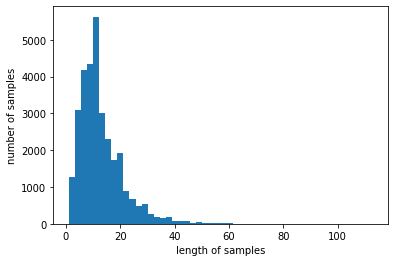

In [68]:
print('최대 길이 :',max(len(l) for l in X_train))
print('평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [69]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [74]:
max_len = 50
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 50 이하인 샘플의 비율: 99.62256908904811


In [75]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_valid = pad_sequences(X_valid, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [ ]:
X_train.shape

In [ ]:
y_train[:5]

In [76]:
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

In [ ]:
y_train[:5]

## Word2Vec _ 이미 학습된 것 불러오기 
~~실패 ,,~~였었는데 성공.. 근데 왜 되는지는 모르겠다 ..


~~이유를 모르겠다 가지고 있는 데이터 중에 이미 학습된 단어가 하나도 없나?????? 정말????~~

In [ ]:
import gensim

# embeddings_index = gensim.models.Word2Vec.load('ko.bin')

In [ ]:
embeddings_index.wv.word_vec('이')

In [ ]:
embedding_dim = 200

embedding_matrix = np.zeros((19979, embedding_dim))

for word, i in word_index.items():
  try:
    embedding_vector = embeddings_index.wv.get_vector(word)
    embedding_matrix[i] = embedding_vector
    
  except KeyError:
    continue

In [ ]:
embedding_matrix.shape

In [ ]:
embedding_matrix[382]

## Word2Vec

In [77]:
tokenized_data = []

In [78]:
for t in train_data['tokenized']:
  tokenized_data.append(t)

In [ ]:
# for s in train_data['tokenized']:
#   result = khaiii_tokenized(s)
#   tokenized_data.append(result)

In [79]:
len(tokenized_data)

31264

In [80]:
import gensim

wv_model = gensim.models.Word2Vec(sentences=tokenized_data,
                               size=200,
                               window=3,
                               min_count=1,
                               workers=4,
                               sg=1)

In [ ]:
wv_model.wv.vocab

In [81]:
wv_model.wv.vectors.shape

(21468, 200)

In [82]:
embedding_dim = 200

embedding_matrix = np.zeros((21468, embedding_dim))

for word, i in word_index.items():
  try:
    embedding_vector = wv_model.wv.get_vector(word)
    embedding_matrix[i] = embedding_vector
    
  except KeyError:
    continue

In [83]:
embedding_matrix.shape

(21468, 200)

## modeling

In [84]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [85]:
model = Sequential()
model.add(Embedding(21468, 200))
model.add(Bidirectional(LSTM(128)))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

In [86]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable=True

In [87]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 200)         4293600   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 256)               336896    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 1799      
Total params: 4,632,295
Trainable params: 4,632,295
Non-trainable params: 0
_________________________________________________________________


In [88]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
mc = ModelCheckpoint('best_model_BiLSTM.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [89]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [90]:
history = model.fit(X_train, y_train, epochs=100, callbacks=[es, mc],
                    batch_size=256, validation_data=(X_valid, y_valid))

Epoch 1/100
123/123 [==============================] - 8s 41ms/step - loss: 1.7409 - acc: 0.3131 - val_loss: 1.6283 - val_acc: 0.3925

Epoch 00001: val_acc improved from -inf to 0.39253, saving model to best_model_BiLSTM.h5
Epoch 2/100
123/123 [==============================] - 4s 35ms/step - loss: 1.4423 - acc: 0.4539 - val_loss: 1.4653 - val_acc: 0.4335

Epoch 00002: val_acc improved from 0.39253 to 0.43347, saving model to best_model_BiLSTM.h5
Epoch 3/100
123/123 [==============================] - 4s 35ms/step - loss: 1.3204 - acc: 0.5089 - val_loss: 1.5767 - val_acc: 0.4147

Epoch 00003: val_acc did not improve from 0.43347
Epoch 4/100
123/123 [==============================] - 4s 34ms/step - loss: 1.2374 - acc: 0.5468 - val_loss: 1.3156 - val_acc: 0.5088

Epoch 00004: val_acc improved from 0.43347 to 0.50883, saving model to best_model_BiLSTM.h5
Epoch 5/100
123/123 [==============================] - 4s 35ms/step - loss: 1.1236 - acc: 0.5914 - val_loss: 1.3777 - val_acc: 0.4852

Ep

In [91]:
loaded_model = load_model('best_model_BiLSTM.h5')
print("테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

2/2 [==============================] - 1s 13ms/step - loss: 1.0426 - acc: 0.6286
테스트 정확도: 0.6286


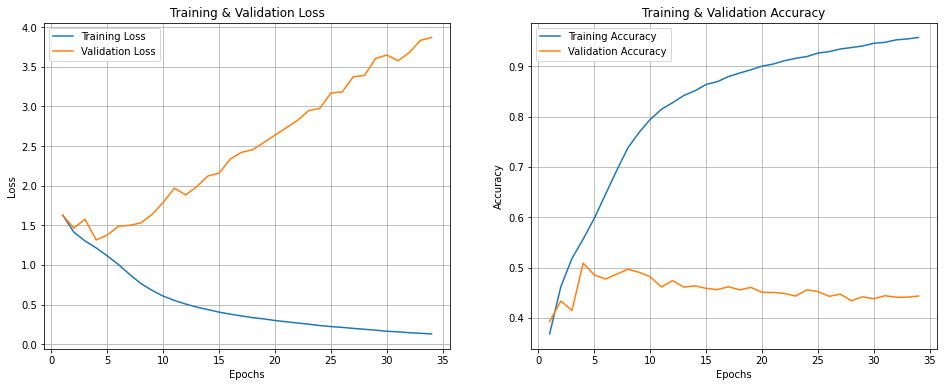

In [92]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['loss']) + 1)

plt.figure(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

In [1]:
from sklearn.metrics import confusion_matrix

def sentiment_predict(sentence):
  sentence = sentence.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣A-Za-z♡ ]', '')
  sentence = khaiii_tokenized(sentence)
  encoded = tokenizer.texts_to_sequences([sentence])
  pad_sentence = pad_sequences(encoded, maxlen=max_len)
  result = loaded_model.predict(pad_sentence)
  print(confusion_matrix(y_test, result))
  print(f'공포: {result[0][0]:.5f}')
  print(f'놀람: {result[0][1]:.5f}')
  print(f'분노: {result[0][2]:.5f}')
  print(f'슬픔: {result[0][3]:.5f}')
  print(f'중립: {result[0][4]:.5f}')
  print(f'혐오: {result[0][5]:.5f}')
  print(f'행복: {result[0][6]:.5f}')


In [2]:
sentence = '그만좀해'
sentiment_predict(sentence)

NameError: ignored